
=== Binary Perceptron Model (Forward/Not Forward) ===
Binary Classification Accuracy: 1.00

=== Multi-Category Perceptron Model ===
Multi-Category Accuracy: 0.50

=== Multi-Layer Perceptron Model ===
MLP Classification Accuracy: 0.50

=== Test Predictions ===

Sensor Reading 1: [4.5, 0.1, 0.8, 4]
Binary Perceptron: FORWARD
Multi Perceptron: MOVE FORWARD
MLP: MOVE FORWARD

Sensor Reading 2: [0.2, 0.3, 0.5, 10]
Binary Perceptron: NOT FORWARD
Multi Perceptron: TURN RIGHT
MLP: TURN RIGHT

Sensor Reading 3: [0.1, 0.8, 0.3, 20]
Binary Perceptron: NOT FORWARD
Multi Perceptron: STOP/REVERSE
MLP: STOP/REVERSE


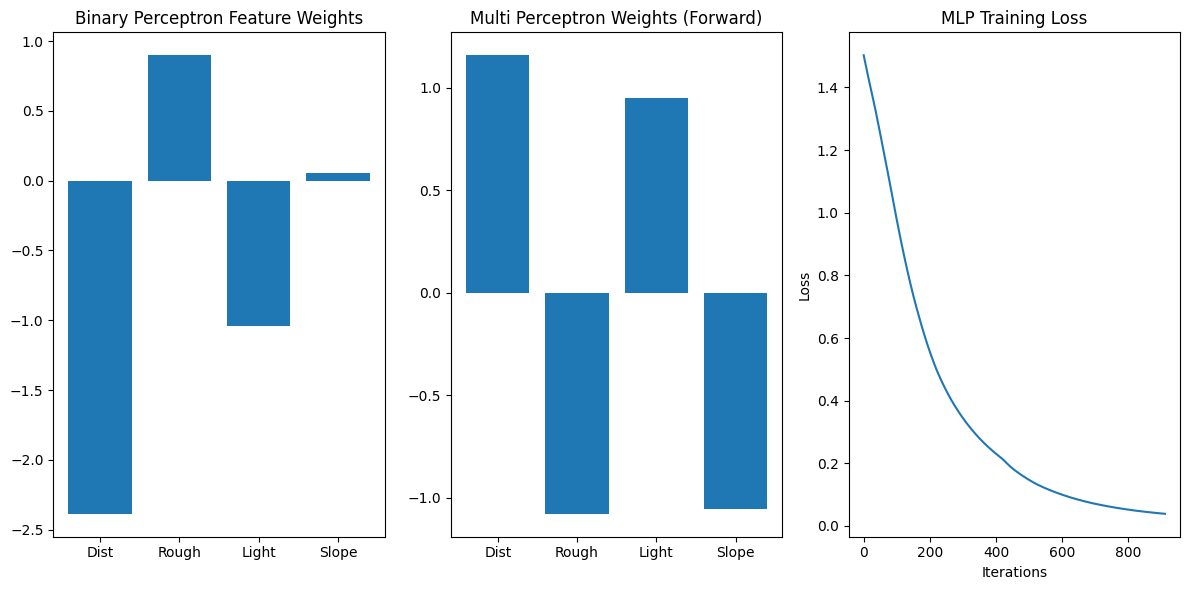

In [1]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Environment features: [distance_to_obstacle, terrain_roughness, light_level, slope_angle]
# Labels:
# 0 = move_forward, 1 = turn_left, 2 = turn_right, 3 = stop/reverse

# Training data - real-world would come from sensors
X = np.array([
    [5.0, 0.2, 0.8, 5],   # Move forward
    [0.3, 0.4, 0.7, 5],    # Turn left
    [0.4, 0.3, 0.6, 5],    # Turn right
    [0.1, 0.9, 0.1, 30],   # Stop
    [4.0, 0.1, 0.9, 2],    # Move forward
    [0.5, 0.5, 0.5, 10],   # Turn left
    [0.2, 0.2, 0.3, 15],   # Turn right
    [0.1, 0.8, 0.2, 25],   # Stop
    [6.0, 0.1, 0.8, 3],    # Move forward
    [0.3, 0.6, 0.4, 8]     # Turn left
])

y = np.array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1])

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 1. Binary Perceptron Model (Forward vs Not Forward)
print("\n=== Binary Perceptron Model (Forward/Not Forward) ===")

# Convert to binary classification (0=forward, 1=not forward)
y_binary = np.where(y == 0, 0, 1)

# Create and train perceptron
binary_perceptron = Perceptron(max_iter=1000, random_state=42)
binary_perceptron.fit(X_train_scaled, y_binary[y_train])

# Evaluate
binary_accuracy = binary_perceptron.score(X_test_scaled, y_binary[y_test])
print(f"Binary Classification Accuracy: {binary_accuracy:.2f}")

## 2. Multi-Category Perceptron Model
print("\n=== Multi-Category Perceptron Model ===")

multi_perceptron = Perceptron(max_iter=1000, random_state=42)
multi_perceptron.fit(X_train_scaled, y_train)

multi_accuracy = multi_perceptron.score(X_test_scaled, y_test)
print(f"Multi-Category Accuracy: {multi_accuracy:.2f}")

## 3. Multi-Layer Perceptron (Neural Network) Model
print("\n=== Multi-Layer Perceptron Model ===")

mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

mlp_accuracy = mlp.score(X_test_scaled, y_test)
print(f"MLP Classification Accuracy: {mlp_accuracy:.2f}")

## Robot Decision Function
def make_decision(model, sensor_readings):
    """Make traversal decision based on sensor inputs"""
    scaled_input = scaler.transform([sensor_readings])
    prediction = model.predict(scaled_input)[0]

    actions = {
        0: "MOVE FORWARD",
        1: "TURN LEFT",
        2: "TURN RIGHT",
        3: "STOP/REVERSE"
    }
    return actions[prediction]

# Test with new sensor readings
test_readings = [
    [4.5, 0.1, 0.8, 4],    # Expected: MOVE FORWARD
    [0.2, 0.3, 0.5, 10],    # Expected: TURN LEFT
    [0.1, 0.8, 0.3, 20]     # Expected: STOP/REVERSE
]

print("\n=== Test Predictions ===")
for i, reading in enumerate(test_readings):
    print(f"\nSensor Reading {i+1}: {reading}")
    print(f"Binary Perceptron: {'FORWARD' if binary_perceptron.predict(scaler.transform([reading]))[0] == 0 else 'NOT FORWARD'}")
    print(f"Multi Perceptron: {make_decision(multi_perceptron, reading)}")
    print(f"MLP: {make_decision(mlp, reading)}")

## Visualization
plt.figure(figsize=(12, 6))

# Plot feature importance for binary perceptron
plt.subplot(1, 3, 1)
plt.bar(['Dist', 'Rough', 'Light', 'Slope'], binary_perceptron.coef_[0])
plt.title("Binary Perceptron Feature Weights")

# Plot feature importance for multi perceptron (forward movement)
plt.subplot(1, 3, 2)
plt.bar(['Dist', 'Rough', 'Light', 'Slope'], multi_perceptron.coef_[0])
plt.title("Multi Perceptron Weights (Forward)")

# Plot loss curve for MLP
plt.subplot(1, 3, 3)
plt.plot(mlp.loss_curve_)
plt.title("MLP Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()